# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
cloudy = []
humidity = []
winds = []
temperature = []
city_name = []
lat = []
lng = []

for city in cities:
    url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID='+api_key+'&q='+city
    response = requests.get(url).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        cloudy.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        winds.append(response['wind']['speed'])
        temperature.append(response['main']['temp'])
        city_name.append(response['name'])
        print(f'Retrieving {city} Data')
    except Exception as e:
        print(f'Skipping {city}')
        #print(e)

Retrieving nuuk Data
Retrieving ribeira grande Data
Retrieving tilichiki Data
Retrieving soyo Data
Retrieving punta arenas Data
Retrieving half moon bay Data
Skipping taolanaro
Retrieving barrow Data
Retrieving ponta do sol Data
Retrieving naze Data
Retrieving kapaa Data
Retrieving atuona Data
Retrieving werda Data
Skipping do rud
Retrieving vaini Data
Retrieving jamestown Data
Retrieving albany Data
Retrieving oranjemund Data
Skipping amderma
Retrieving bozoum Data
Retrieving boquira Data
Retrieving hermanus Data
Retrieving cidreira Data
Retrieving bilibino Data
Retrieving khunti Data
Skipping bjala
Skipping sitio novo do tocantins
Retrieving kodiak Data
Retrieving bluff Data
Retrieving tiksi Data
Retrieving butaritari Data
Retrieving qaqortoq Data
Retrieving urucara Data
Retrieving hithadhoo Data
Retrieving meadow lake Data
Retrieving sorland Data
Retrieving coxim Data
Retrieving buchanan Data
Retrieving le locle Data
Retrieving north bend Data
Retrieving chiredzi Data
Retrieving por

Retrieving chintamani Data
Retrieving ancud Data
Retrieving padang Data
Retrieving eger Data
Retrieving zhob Data
Retrieving atar Data
Retrieving sawtell Data
Retrieving mount gambier Data
Retrieving rio grande Data
Retrieving seidu Data
Retrieving honningsvag Data
Retrieving leningradskiy Data
Skipping kemijarvi
Skipping metehara
Retrieving namibe Data
Retrieving bogorodskoye Data
Retrieving kviteseid Data
Retrieving ferrol Data
Retrieving rock sound Data
Skipping khonuu
Retrieving saedinenie Data
Retrieving la ronge Data
Skipping alappuzha
Retrieving shu Data
Retrieving coquimbo Data
Skipping samusu
Retrieving hayden Data
Retrieving maceio Data
Retrieving deputatskiy Data
Retrieving lumphat Data
Retrieving alofi Data
Retrieving kosh-agach Data
Retrieving palmer Data
Retrieving hamilton Data
Skipping asfi
Retrieving kazanka Data
Retrieving dhidhdhoo Data
Retrieving berdigestyakh Data
Retrieving buckeye Data
Retrieving ciudad bolivar Data
Retrieving sitka Data
Retrieving xuddur Data
Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_data = pd.DataFrame({'City': city_name,
                            'Cloudiness': cloudy,
                            'Humidity': humidity,
                            'Lat': lat,
                            'Lng': lng,
                            'Max Temp': temperature,
                            'Wind Speed': winds},index = [city_name])
weather_data.count()

City          528
Cloudiness    528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [9]:
weather_data.head()
weather_data.to_csv("WeatherData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

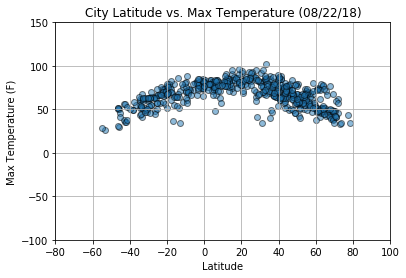

In [10]:
LVT_scat = plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker="o", edgecolors="black", alpha=0.50)

plt.xlim(-80,100)
plt.ylim(-100,150)
plt.grid()

plt.title('City Latitude vs. Max Temperature (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

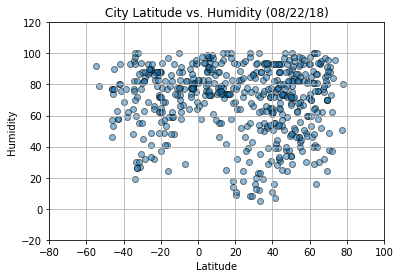

In [14]:
LVH_scat = plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', edgecolors='black', alpha=0.50)

plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid()

plt.title('City Latitude vs. Humidity (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig('Humididty.png')
plt.show()

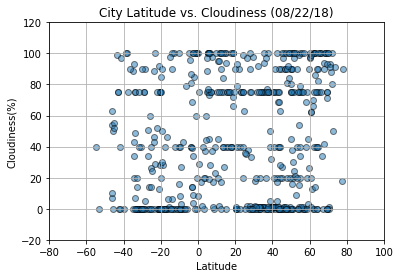

In [15]:
LVC_scat = plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o', edgecolors='black', alpha=0.5)

plt.xlim(-80,100)
plt.ylim(-20,120)
plt.grid()

plt.title('City Latitude vs. Cloudiness (08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')


plt.savefig('Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

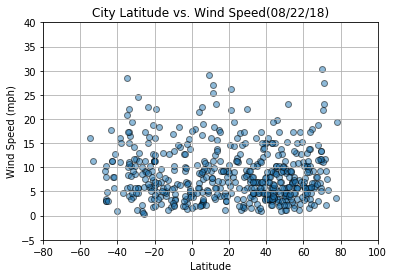

In [17]:
LVW_scat = plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], marker='o', edgecolors='black', alpha=0.5)

plt.xlim(-80,100)
plt.ylim(-5,40)
plt.grid()

plt.title('City Latitude vs. Wind Speed(08/22/18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('WindSpeed.png')
plt.show()